In [4]:
import pandas as pd

In [5]:
 df = pd.read_csv('airfoil_self_noise.dat', sep = "\t",  header=None)

In [6]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


This problem has the following inputs:
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters.
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

The only output is:
6. Scaled sound pressure level, in decibels.

In [7]:
df.columns = ['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side','pressure level']
# name given to the columns

In [8]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [9]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

### Remove Outliers

In [10]:
def remove_outliers(df,col,k):   # k is num of sd
    mean = df[col].mean()
    global df1              # data frame after removing outliers
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k*sd)]
    final_list = [x for x in final_list if (x < mean +k*sd)]
    df1 = df.loc[df[col].isin(final_list)]
    print(df1.shape)
    print("Number of outliers removed==>",df.shape[0]- df1.shape[0])

In [11]:
remove_outliers(df,'pressure level',2)

(1439, 6)
Number of outliers removed==> 64


In [12]:
df = df1

In [13]:
x = df.iloc[:,0:5]
y = df.iloc[:,-1]

In [14]:
x

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1492,630,15.6,0.1016,39.6,0.052849
1493,800,15.6,0.1016,39.6,0.052849
1494,1000,15.6,0.1016,39.6,0.052849
1495,1250,15.6,0.1016,39.6,0.052849


In [15]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1492    118.084
1493    118.964
1494    119.224
1495    118.214
1496    114.554
Name: pressure level, Length: 1439, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [18]:
train_x

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
642,4000,9.9,0.1524,71.3,0.019300
1211,400,22.2,0.0254,71.3,0.021418
712,400,12.6,0.1524,39.6,0.058411
23,4000,0.0,0.3048,55.5,0.002831
334,800,4.0,0.2286,39.6,0.004738
...,...,...,...,...,...
887,250,15.4,0.0508,55.5,0.027193
550,3150,5.4,0.1524,71.3,0.004012
490,2000,0.0,0.1524,39.6,0.001933
901,6300,15.4,0.0508,55.5,0.027193


In [19]:
import seaborn as sns


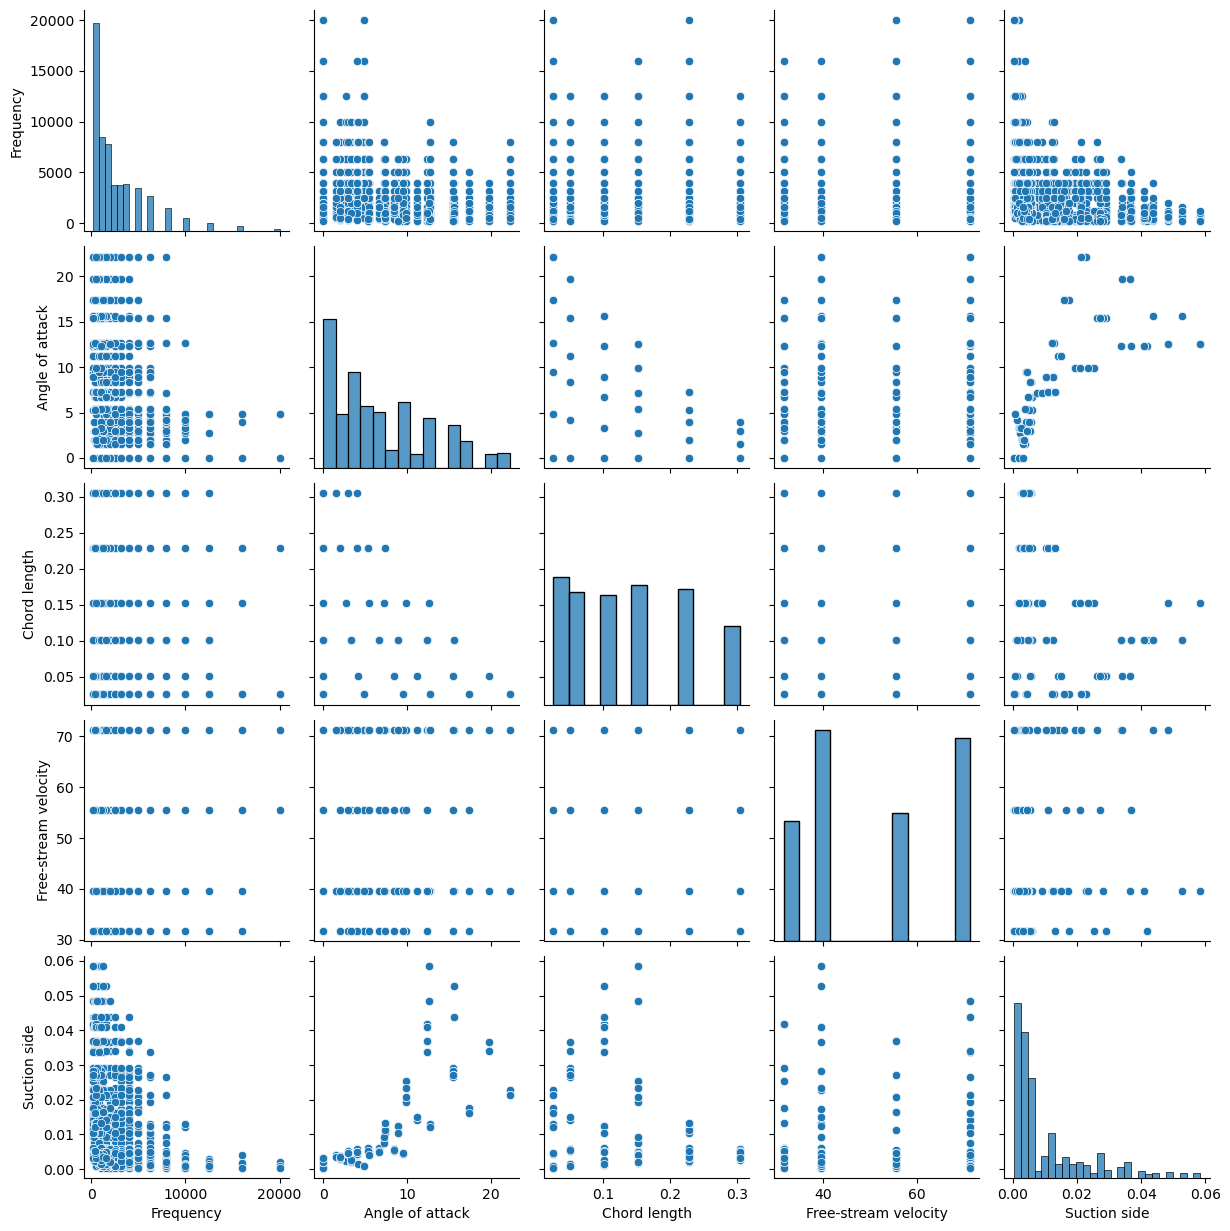

In [20]:
sns.pairplot(train_x)

In [21]:
import matplotlib.pyplot as plt

In [22]:
train_x.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.288468,-0.049245,0.121495,-0.284135
Angle of attack,-0.288468,1.000000,-0.510520,0.079084,0.766165
Chord length,-0.049245,-0.510520,1.000000,-0.019500,-0.235149
Free-stream velocity,0.121495,0.079084,-0.019500,1.000000,0.016287
Suction side,-0.284135,0.766165,-0.235149,0.016287,1.000000


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
lr.fit(train_x,train_y)

LinearRegression()

### Rsquare

In [25]:
Rsquare = lr.score(train_x,train_y)
Rsquare

0.44340151183450227

In [26]:
N = train_x.shape[0]
K =  train_x.shape[1]

AdjRsqure = 1-((1-Rsquare)*(N-1)/(N-K-1))
AdjRsqure

0.44097095075081016

### Prediction

In [27]:
pred_train = lr.predict(train_x)
pred_test = lr.predict(test_x)

In [28]:
train_err = train_y - pred_train
test_err = test_y - pred_test             # Actual - Prediction

### To check the mape,mse,rmse on the test data¶

In [30]:
import numpy as np

In [31]:
mse = np.mean(np.square(test_err))  # mean---Squre---Error
rmse = np.sqrt(mse)
mape =  np.mean(np.abs((test_err *100/test_y)))

In [32]:
mse

20.52950366011037

In [33]:
rmse

4.530949531843229

In [34]:
mape

2.884344157901172

In [35]:
import numpy as np

In [36]:
np.mean(train_err)

-7.654847891768239e-15

(array([ 2.,  1.,  2.,  1.,  1.,  1.,  7.,  5.,  9.,  7., 16., 24., 28.,
        37., 37., 41., 54., 68., 84., 95., 85., 64., 72., 51., 76., 56.,
        46., 54., 26., 33., 19., 22.,  8.,  6.,  5.,  4.,  1.,  0.,  1.,
         2.]),
 array([-16.26826703, -15.48941528, -14.71056354, -13.9317118 ,
        -13.15286006, -12.37400831, -11.59515657, -10.81630483,
        -10.03745309,  -9.25860134,  -8.4797496 ,  -7.70089786,
         -6.92204612,  -6.14319437,  -5.36434263,  -4.58549089,
         -3.80663915,  -3.0277874 ,  -2.24893566,  -1.47008392,
         -0.69123218,   0.08761957,   0.86647131,   1.64532305,
          2.42417479,   3.20302653,   3.98187828,   4.76073002,
          5.53958176,   6.3184335 ,   7.09728525,   7.87613699,
          8.65498873,   9.43384047,  10.21269222,  10.99154396,
         11.7703957 ,  12.54924744,  13.32809919,  14.10695093,
         14.88580267]),
 <BarContainer object of 40 artists>)

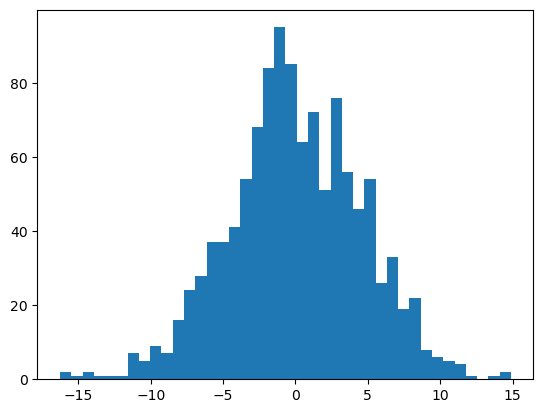

In [37]:
%matplotlib inline
plt.hist(train_err, bins = 40)

In [38]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = train_y
actual_pred['Predicted'] = pred_train

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

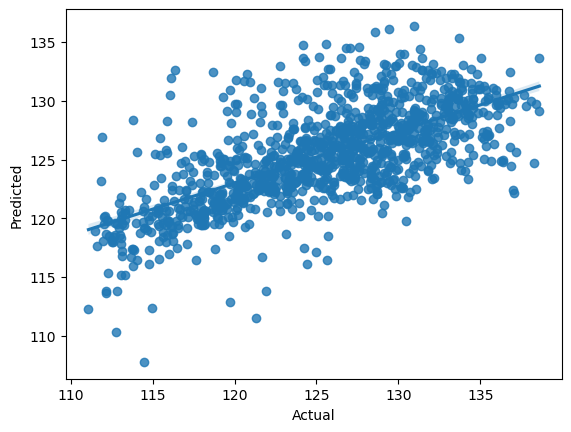

In [39]:
%matplotlib inline
sns.regplot(x = 'Actual',y = 'Predicted',data = actual_pred)

In [40]:
import pickle
pickle_model = pickle.dump(lr, open('model.pkl','wb'))

In [41]:
#!pip install flask

In [42]:
pickle_model = pickle.load(open('model.pkl','rb'))
pickle_model.predict(test_x)

array([128.97297096, 127.33209981, 117.27926731, 124.42737156,
       120.92953696, 123.73260972, 119.12596735, 134.28306914,
       123.90131858, 129.62673828, 125.01055878, 123.82732007,
       125.39164316, 122.07031681, 128.72534893, 122.87465744,
       129.93587542, 123.99775252, 122.51947626, 120.79250501,
       130.28414677, 122.27560944, 126.11674778, 123.45598617,
       130.84236989, 123.50800184, 129.76747718, 121.68240372,
       125.01796523, 123.70276057, 126.29159851, 130.38649184,
       132.75953026, 123.16212653, 126.22232227, 127.12604288,
       125.93170783, 131.10241778, 122.88111849, 122.37081463,
       122.0787282 , 127.80166042, 128.55836515, 125.96303035,
       123.0520254 , 123.31199118, 129.22370094, 125.73594684,
       125.78549399, 125.57032123, 129.93261625, 123.53684873,
       124.33126729, 120.52763543, 127.00584421, 123.01865786,
       121.10274532, 118.83498895, 127.35175636, 124.06954584,
       122.81996918, 131.79168171, 123.37862468, 127.59

### Ridge

In [43]:
from sklearn.linear_model import Ridge
rg = Ridge()

In [44]:
rg.fit(train_x,train_y)

Ridge()

In [45]:
Rsquare = rg.score(train_x,train_y)
Rsquare

0.4305365175909327

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor()

In [48]:
rf.fit(train_x,train_y)

RandomForestRegressor()

In [49]:
Rsquare = rf.score(train_x,train_y)
Rsquare

0.988007709990812

In [50]:
pred_train = rf.predict(train_x)
pred_test = rf.predict(test_x)

In [51]:
train_err = train_y - pred_train
test_err = test_y - pred_test

In [52]:
mse = np.mean(np.square(test_err))  # mean---Squre---Error
rmse = np.sqrt(mse)
mape =  np.mean(np.abs((test_err *100/test_y)))

In [53]:
mse

2.735815865976419

In [54]:
rmse

1.6540301889555762

In [55]:
mape

0.9627913314361626

In [56]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = train_y
actual_pred['Predicted'] = pred_train

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

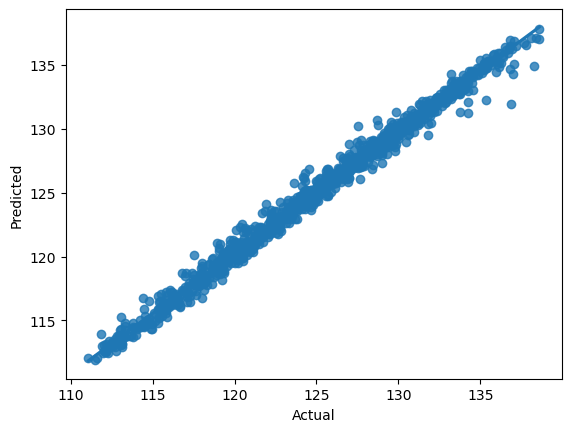

In [57]:
sns.regplot(x = 'Actual',y = 'Predicted',data = actual_pred)

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dt = DecisionTreeRegressor()

In [60]:
dt.fit(train_x,train_y)

DecisionTreeRegressor()

In [61]:
Rsquare = dt.score(train_x,train_y)
Rsquare

1.0